# Data Real

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')           # Turn off the warnings. 
%matplotlib inline


#  Cargar el conjunto de datos "Iris" de Seaborn
df = sns.load_dataset('iris')
X = df.drop(columns=['species'])                        
Y = df['species']                                       
header_X = X.columns  #guardar los nombres de las columnas en x
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# K-Means clustering 

In [2]:
# Se aplica metodo de K-means

kmeans = KMeans(n_clusters=3, random_state=123)         # kmeans object for 3 clusters. 
kmeans.fit(X)                                           # Unsupervised learning => Only X.
res = pd.Series(kmeans.labels_)                         # Cluster labeling result as Series.
print(res)
# En res queda guardada la prediccion de cada fila del df utilizando el metodo de kmeans


0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    2
147    0
148    0
149    2
Length: 150, dtype: int32


In [3]:
# Tabla de frecuencia de las observaciones etiquetadas como '0'.
# Este cluster tiene la mayoría 'virginica'.
case0 = Y[res==0]
print(case0.value_counts())

virginica     36
versicolor     2
Name: species, dtype: int64


In [4]:
# Tabla de frecuencias de las observaciones etiquetadas como '1'.
# Este cluster corresponde enteramente a 'setosa'.
case1 = Y[res==1]
print(case1.value_counts())

setosa    50
Name: species, dtype: int64


In [5]:
# Tabla de frecuencia de las observaciones etiquetadas como '2'.
# Este cluster tiene la mayoría 'versicolor'.
case2 = Y[res==2]
print(case2.value_counts())

versicolor    48
virginica     14
Name: species, dtype: int64


In [6]:
# Imprime los centros de los clusters (centroides).
np.round(pd.DataFrame(kmeans.cluster_centers_,columns=header_X,
                      index=['Cluster 0','Cluster 1','Cluster 2']),2)

,sepal_length,sepal_width,petal_length,petal_width
Cluster 0,6.85,3.07,5.74,2.07
Cluster 1,5.01,3.43,1.46,0.25
Cluster 2,5.90,2.75,4.39,1.43


podemos observar cuales fueron esas medidas de referencia en las que se centro el cluster para hallar la distancia que determina que tipo de planta es

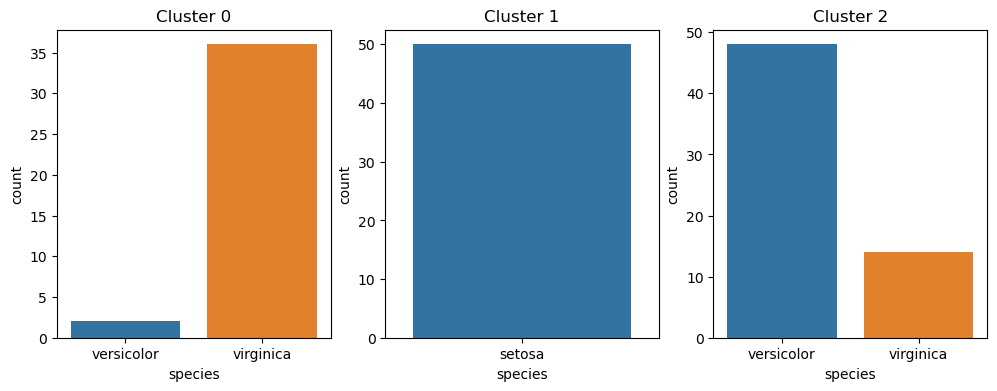

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.countplot(x=case0, ax=axs[0]).set_title('Cluster 0')
sns.countplot(x=case1, ax=axs[1]).set_title('Cluster 1')
sns.countplot(x=case2, ax=axs[2]).set_title('Cluster 2')

plt.show()

###  Predicción basada en lo aprendido

In [28]:
# Una lista que contiene las etiquetas aprendidas.
learnedLabels = ['Virginica','Setosa','Versicolor']  

# Para una observación dada de X, predecir la especie a partir de lo que hemos aprendido. 

# Caso #1.
X_test = {'sepal_length': [7.0] ,'sepal_width': [3.0] ,
          'petal_length': [5.0]  ,'petal_width': [1.5] } 
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print(f"Predice el cluster {predCluster} con la mayor probabilidad en {learnedLabels[predCluster]}")

Predice el cluster 0 con la mayor probabilidad en Virginica


In [29]:
# Caso #2.
X_test = {'sepal_length': [4.5] ,'sepal_width': [3.0] ,
          'petal_length': [1.0]  ,'petal_width': [1.0] }   
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print(f"Predice el cluster {predCluster} con la mayor probabilidad en {learnedLabels[predCluster]}")

Predice el cluster 1 con la mayor probabilidad en Setosa


In [31]:
# Caso #3.
X_test = {'sepal_length': [6.0] ,'sepal_width': [3.0] , 'petal_length': [4.0]  ,'petal_width': [1.0] }   
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print(f"Predice el cluster {predCluster} con la mayor probabilidad en {learnedLabels[predCluster]}")

Predice el cluster 2 con la mayor probabilidad en Versicolor


# Clustering jerarquico

Creación de clústeres jerárquicos

Para usar las columnas 'petal_length' y 'petal_width', 
importe el agrupamiento aglomerativo de sklearn, que es compatible con el paquete 
sklearn.clustering.

Los criterios de medición de distancia entre agrupaciones se pueden establecer 
con el parámetro de vinculación, que solo admite afinidad euclidiana, completa y promedio. 
Mira cómo se usan los tres casos.

# AgglomerativeClustering

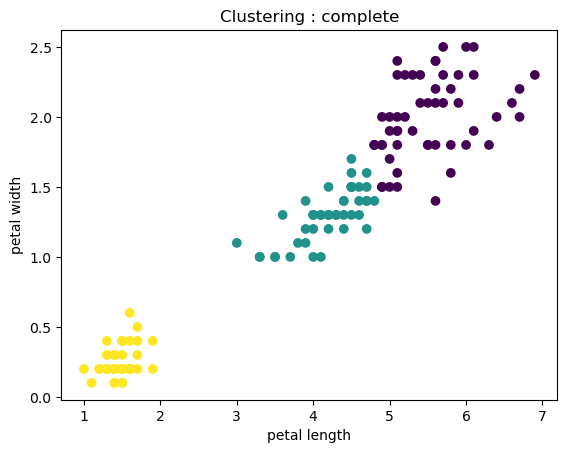

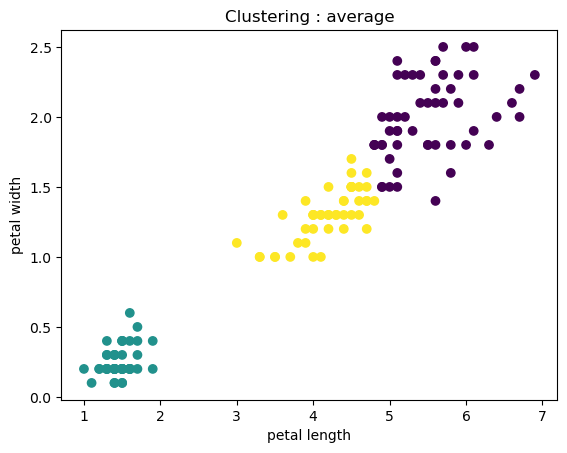

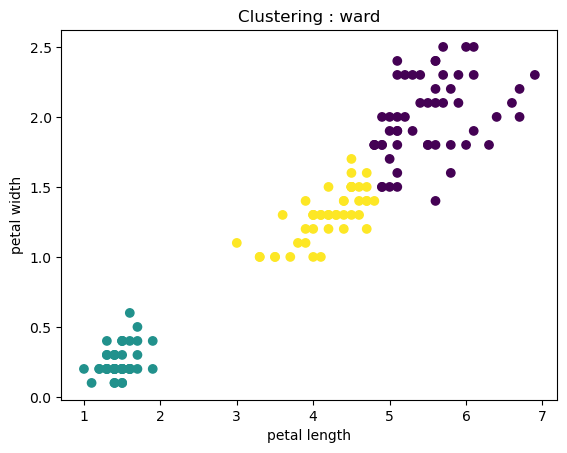

en las graficas se muestran los 3 tipos de afinidades empleando el método AgglomerativeClustering


In [34]:
iris_data_pd=df

from sklearn.cluster import AgglomerativeClustering
likage=["complete","average","ward"]
for idx, i in enumerate(likage):
    plt.figure(idx)
    hier=AgglomerativeClustering(n_clusters=3, affinity="euclidean",linkage=i)
    hier.fit(iris_data_pd.iloc[:,2:4])
    plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3],c=hier.labels_)
    plt.title("Clustering : "+ i)
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.show()
print("en las graficas se muestran los 3 tipos de afinidades empleando el método AgglomerativeClustering")

# Metodo jerarquico


 __________________HIERARCHY COMPLETE_______________________


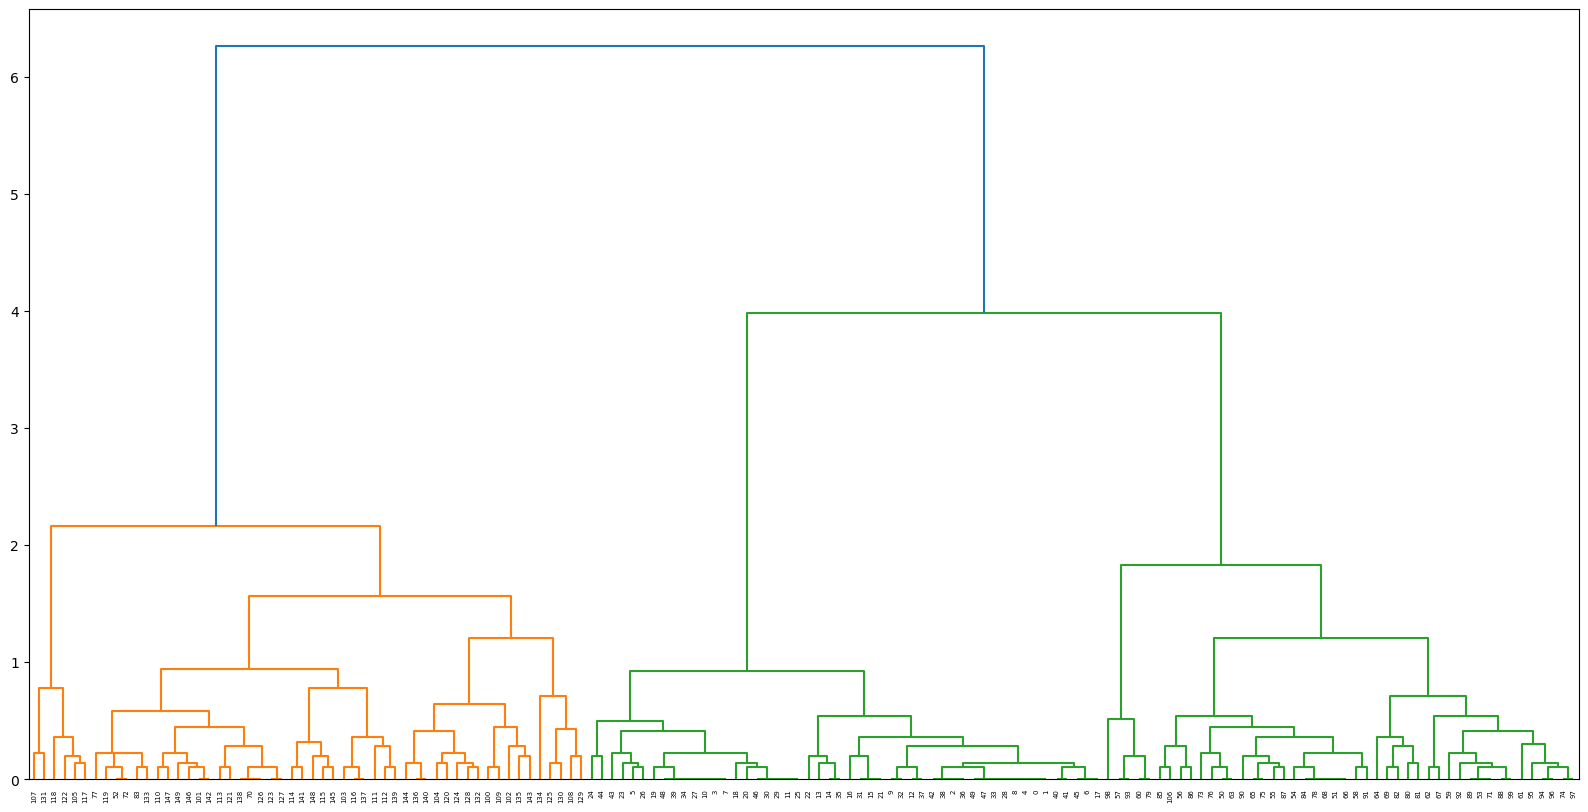

In [40]:
from scipy.cluster import hierarchy
print("\n __________________HIERARCHY COMPLETE_______________________")
hierar=hierarchy.linkage(iris_data_pd.iloc[:,2:4],"complete")
plt.figure(figsize=(20,10))
dn=hierarchy.dendrogram(hierar)

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
#labels = fcluster(hierar, 0.23, criterion='distance')         
labels = fcluster(hierar, 2.5, criterion='distance')   
# escojo 2.5 como punto de corte al observar que en la gráfica es donde los cluster ya estan
# bien definidos
pd.Series(labels).value_counts()

1    54
2    50
3    46
dtype: int64


 __________________HIERARCHY SINGLE _______________________


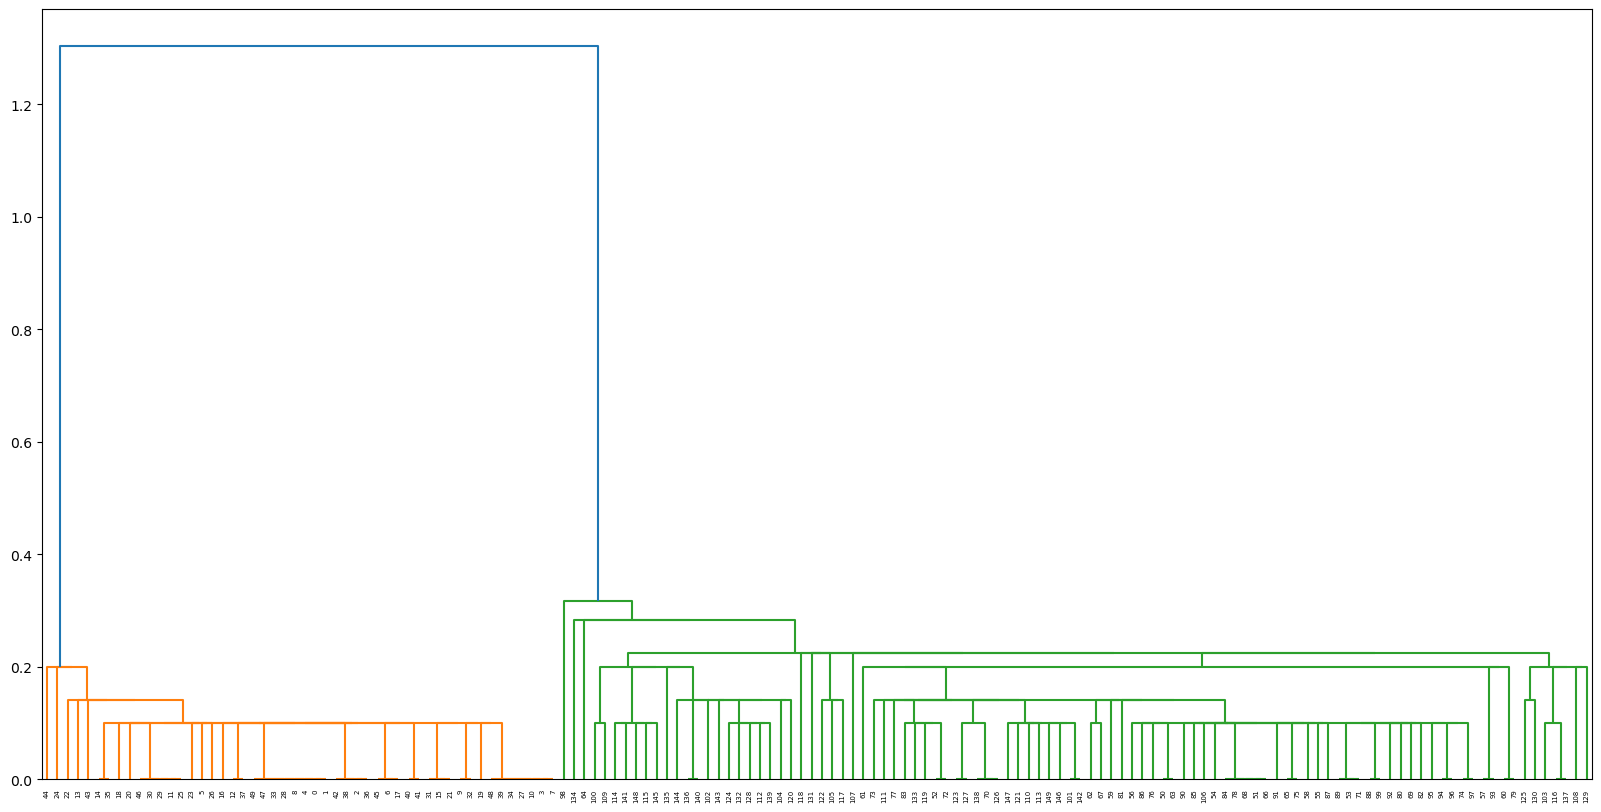

In [41]:
print("\n __________________HIERARCHY SINGLE _______________________")
hierar=hierarchy.linkage(iris_data_pd.iloc[:,2:4],"single")
plt.figure(figsize=(20,10))
dn=hierarchy.dendrogram(hierar)

In [42]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
labels = fcluster(hierar, 0.4, criterion='distance')  
pd.Series(labels).value_counts()

2    100
1     50
dtype: int64

A diferencia del enlace completo,el enlace único crea una agrupación jerárquica 
a partir de los elementos más cercanos. Es muy diferente de K-means 
en el sentido de que el enlace único crea un grupo jerárquico en forma de árbol.
Es importante seleccionar un tipo de enlace apropiado para crear un modelo que sea adecuado
para la condición de los datos.
